In [225]:
from models.model import vanilla_nn
from datasets.synth import oneD_linear

import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm_notebook
from tqdm import tqdm

import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

In [178]:
train_set = oneD_linear(size=2)
train_gen = DataLoader(train_set)

In [228]:
num_nets = 300

In [257]:
lr = 1e-2
max_epochs = 1000
criterion = nn.MSELoss()
nets = [vanilla_nn(hidden_size=16, num_layers=20) for x in range(num_nets)]
opts = [optim.SGD(x.parameters(), lr=lr) for x in nets]

In [258]:
for epoch in tqdm(range(max_epochs)):
    for batch_idx, batch_data in enumerate(train_gen):
        batch_X, batch_y = batch_data
        batch_X, batch_y = batch_X.float(), batch_y.float()
        for idx in range(len(opts)):
            opts[idx].zero_grad()
            batch_pred = nets[idx](batch_X)
            loss = criterion(batch_pred, batch_y)
            loss.backward()
            opts[idx].step()
    if epoch % 100 == 0:
        print('Epoch {} finished'.format(epoch))
        print(loss.item())

  0%|          | 1/1000 [00:01<23:31,  1.41s/it]

Epoch 0 finished
1.0538665056228638


 10%|█         | 101/1000 [02:25<21:32,  1.44s/it]

Epoch 100 finished
1.0211111307144165


 20%|██        | 201/1000 [04:48<18:58,  1.43s/it]

Epoch 200 finished
1.0207786560058594


 30%|███       | 301/1000 [07:11<16:39,  1.43s/it]

Epoch 300 finished
1.0207372903823853


 40%|████      | 401/1000 [09:34<14:14,  1.43s/it]

Epoch 400 finished
1.0207033157348633


 50%|█████     | 501/1000 [11:57<11:49,  1.42s/it]

Epoch 500 finished
1.0206719636917114


 60%|██████    | 601/1000 [14:20<09:28,  1.42s/it]

Epoch 600 finished
1.0206431150436401


 70%|███████   | 701/1000 [16:43<07:09,  1.44s/it]

Epoch 700 finished
1.0206165313720703


 80%|████████  | 801/1000 [19:06<04:44,  1.43s/it]

Epoch 800 finished
1.0205919742584229


 90%|█████████ | 901/1000 [21:29<02:20,  1.42s/it]

Epoch 900 finished
1.0205695629119873


100%|██████████| 1000/1000 [23:51<00:00,  1.43s/it]


In [259]:
with torch.no_grad():
    for idx in range(len(nets)):
        print(nets[idx](torch.tensor([[-1.0], [1.0]])))

tensor([[0.0101],
        [0.0101]])
tensor([[0.0101],
        [0.0101]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[0.0112],
        [0.0112]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[0.0101],
        [0.0101]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[0.0101],
        [0.0101]])
tensor([[0.0133],
        [0.0133]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[0.0101],
        [0.0101]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[0.0101],
        [0.0101]])
tensor([[0.0101],
        [0.0101]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[0.0101],
        [0.0101]])
tensor([[0.0101],
        [0.0101]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[0.0123],
        [0.0123]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[0.0101],
        [0.0102]])
tensor([[0.0106],
        [0.0110]])
tensor([[0.011

tensor([[0.0203],
        [0.0191]])
tensor([[0.0114],
        [0.0114]])
tensor([[0.0101],
        [0.0101]])
tensor([[0.0102],
        [0.0102]])
tensor([[0.0101],
        [0.0101]])
tensor([[0.0101],
        [0.0101]])
tensor([[0.0102],
        [0.0103]])
tensor([[0.0101],
        [0.0101]])
tensor([[0.0101],
        [0.0101]])
tensor([[0.0109],
        [0.0109]])
tensor([[0.0101],
        [0.0101]])
tensor([[-0.9997],
        [ 1.0000]])
tensor([[0.0103],
        [0.0103]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[0.0103],
        [0.0103]])
tensor([[0.0078],
        [0.0228]])
tensor([[0.0116],
        [0.0242]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[0.0105],
        [0.0105]])
tensor([[0.0101],
        [0.0101]])
tensor([[0.0112],
        [0.0112]])
tensor([[0.0103],
        [0.0103]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[-1.0000],
        [ 1.0000]])
tensor([[-1.0000],
     

In [260]:
in_betw = torch.from_numpy(np.linspace(-10, 10, 100).reshape(-1,1)).float()

In [261]:
with torch.no_grad():
    outputs = [x(in_betw) for x in nets]

(-1, 1)

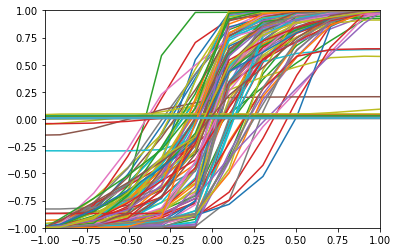

In [262]:
for output in outputs:
    plt.plot(in_betw.numpy(), output.numpy())
plt.xlim(-1,1)
plt.ylim(-1,1)

In [263]:
with torch.no_grad():
    f_0 = np.array([x(torch.tensor([0.0])).numpy() for x in nets])
print('mean: {0:.2f}, std: {1:.2f}'.format(np.mean(f_0), np.std(f_0)))

mean: 0.02, std: 0.29


In [264]:
means = []
stds = []
for i in range(num_nets):
    subset_f_0 = f_0[np.random.choice(f_0.shape[0], size=i),:]
    means.append(np.mean(subset_f_0))
    stds.append(np.std(subset_f_0))
    print('{0} members | mean: {1:.2f}, std: {2:.2f}'.format(i, np.mean(subset_f_0), np.std(subset_f_0)))

0 members | mean: nan, std: nan
1 members | mean: 0.01, std: 0.00
2 members | mean: 0.01, std: 0.00
3 members | mean: 0.01, std: 0.00
4 members | mean: -0.07, std: 0.13
5 members | mean: 0.23, std: 0.29
6 members | mean: 0.06, std: 0.31
7 members | mean: 0.15, std: 0.24
8 members | mean: 0.01, std: 0.00
9 members | mean: -0.10, std: 0.30
10 members | mean: -0.00, std: 0.25
11 members | mean: 0.10, std: 0.17
12 members | mean: -0.11, std: 0.36
13 members | mean: -0.10, std: 0.30
14 members | mean: 0.17, std: 0.30
15 members | mean: 0.09, std: 0.37
16 members | mean: 0.00, std: 0.25
17 members | mean: 0.07, std: 0.30
18 members | mean: -0.07, std: 0.34
19 members | mean: 0.08, std: 0.21
20 members | mean: 0.06, std: 0.35
21 members | mean: -0.04, std: 0.26
22 members | mean: 0.03, std: 0.12
23 members | mean: 0.06, std: 0.35
24 members | mean: 0.07, std: 0.42
25 members | mean: -0.02, std: 0.29
26 members | mean: 0.04, std: 0.25
27 members | mean: 0.00, std: 0.35
28 members | mean: 0.08,

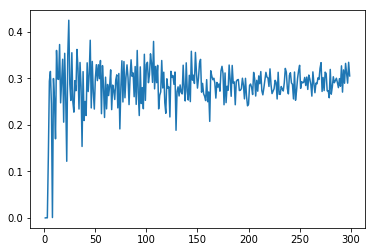

In [265]:
plt.plot(stds)